### Machine Learning for Classification

##### This is a classification task to predict if a client has signed up on the platform or not.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mutual_info_score

> Load Dataset

In [2]:
train_data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv")
train_data.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [3]:
# understanding dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [4]:
train_data.fillna(
    {col: "NA" if train_data[col].dtype == "object" else 0 for col in train_data.columns},
    inplace=True
)


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1462 non-null   object 
 1   industry                  1462 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1462 non-null   float64
 4   employment_status         1462 non-null   object 
 5   location                  1462 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


##### Question 1

In [6]:
freq_industry = train_data.industry.mode()
print(freq_industry)

0    retail
Name: industry, dtype: object


##### Question 2

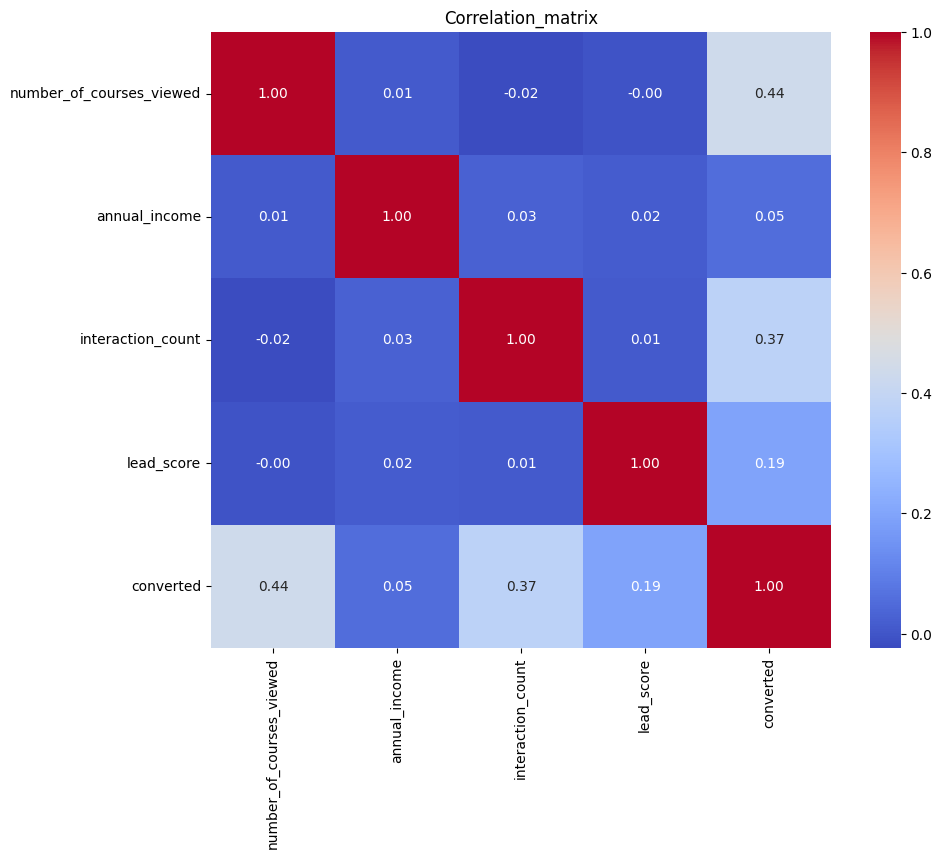

In [7]:
# Understanding correlation
corr_matrix = train_data.corr(numeric_only = True)

# Display
corr_matrix

# Visualizing 
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation_matrix")
plt.show()

In [8]:
# Define target 
target = "converted"
X = train_data.drop(target, axis = 1)
y = train_data[target]

# Split data  into train and test data
X_, X_test, y_, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

# Split data into train and validation set  
X_train, X_val, y_train, y_val = train_test_split(X_,y_,test_size = 0.25, random_state = 42)


In [9]:
print(y_val.shape == y_test.shape)

True


##### Question 3

In [10]:
mi_scores = {}

for col in X_train.columns:
    if X_train[col].dtype == "object":
        mi = round(mutual_info_score(y_train, X_train[col]),2)
        mi_scores[col] = mi

# Convert to DataFrame for easier viewing
mi_df = pd.DataFrame(mi_scores.items(), columns=['Feature', 'Mutual Information Score'])
mi_df.sort_values(by='Mutual Information Score', ascending=False, inplace=True)

print(mi_df)

             Feature  Mutual Information Score
0        lead_source                      0.04
1           industry                      0.01
2  employment_status                      0.01
3           location                      0.00


In [11]:
from sklearn.feature_extraction import DictVectorizer
# Create the DictVectorizer
dv = DictVectorizer(sparse=False)

def encode_with_dv(df, fit=False):
   
   # Select categorical and numeric columns
    cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
    num_cols = df.select_dtypes(include=["int", "float"]).columns.tolist()

    # Convert to list of dictionaries
    df_dict = df[cat_cols + num_cols].to_dict(orient="records")

    # Fit or just transform depending on the dataset
    if fit:
        encoded = dv.fit_transform(df_dict)
    else:
        encoded = dv.transform(df_dict)

    return encoded


In [12]:
X_train = encode_with_dv(X_train, fit=True)
X_val = encode_with_dv(X_val)
X_test = encode_with_dv(X_test)

In [13]:
X_train

array([[5.8472e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.1738e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00],
       [8.1973e+04, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        3.0000e+00],
       ...,
       [8.9042e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.0259e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+00]], shape=(876, 31))

In [14]:
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

In [15]:
# Building a logistic regression model
model = LogisticRegression(solver="liblinear", C=10, 
                           max_iter=1000, random_state=42)

model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [16]:
val_pred = model.predict(X_val)

(y_val == val_pred).mean()

np.float64(0.6996587030716723)

In [17]:
val_pred_df = pd.DataFrame()
val_pred_df["predicted"] = val_pred
val_pred_df["actual"] = y_val

In [18]:
val_pred_df

,predicted,actual
0,1,0
1,1,1
2,1,0
3,0,0
4,1,0
...,...,...
288,0,0
289,1,1
290,0,0
291,1,1


#### Model Evaluation

##### Question 1
Evaluating the importance of numerical variables

In [19]:
train_data.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [20]:
from sklearn.metrics import roc_auc_score
df = train_data.copy()

# Identify target and features
target_col = "converted"
y = df[target_col]
X = df.drop(columns=[target_col])

# Select numerical columns
num_cols = X.select_dtypes(include=[np.number]).columns

# Compute ROC AUC for each numerical variable
auc_scores = {}

for col in num_cols:
    x = X[col]
    
    # skip columns with constant values
    if x.nunique() < 2:
        continue

    auc = roc_auc_score(y, x)

    # if negatively correlated, invert
    if auc < 0.5:
        auc = roc_auc_score(y, -x)

    auc_scores[col] = auc

# Create and sort DataFrame
auc_df = (
    pd.DataFrame({"Feature": list(auc_scores.keys()), "ROC_AUC": list(auc_scores.values())})
    .sort_values(by="ROC_AUC", ascending=False)
    .reset_index(drop=True)
)

# Display result
print(auc_df)


                    Feature   ROC_AUC
0  number_of_courses_viewed  0.760827
1         interaction_count  0.722321
2                lead_score  0.614805
3             annual_income  0.542641


##### Question 2

In [23]:
df = train_data.copy()

# Define target
target_col = "converted"
y = df[target_col]
X = df.drop(columns=[target_col])

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert DataFrame to list of dicts for DictVectorizer
train_dict = X_train.to_dict(orient="records")
val_dict = X_val.to_dict(orient="records")

# Apply one-hot encoding
dv = DictVectorizer(sparse=False)
X_train_encoded = dv.fit_transform(train_dict)
X_val_encoded = dv.transform(val_dict)

# Train logistic regression model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train_encoded, y_train)

# Predict on validation data
y_pred = model.predict_proba(X_val_encoded)[:, 1]

# Evaluate model
auc = roc_auc_score(y_val, y_pred)
print(f"Validation ROC AUC: {auc:.3f}")


Validation ROC AUC: 0.765


##### Question 3

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


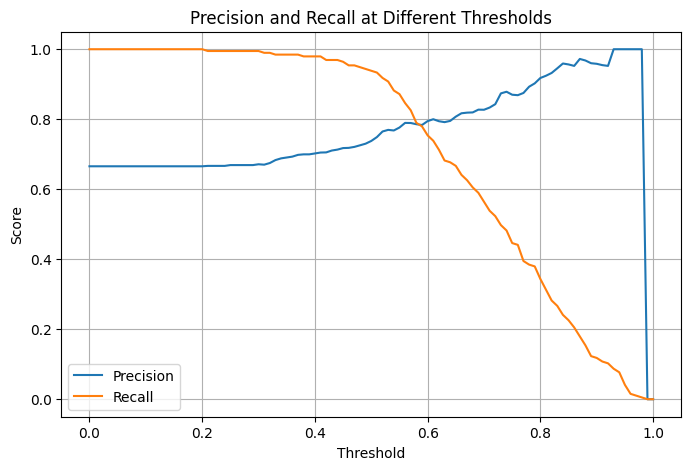

In [24]:
from sklearn.metrics import precision_score, recall_score

thresholds = np.arange(0.0, 1.01, 0.01)

precisions = []
recalls = []

for t in thresholds:
    y_pred_bin = (y_pred >= t)
    precisions.append(precision_score(y_val, y_pred_bin))
    recalls.append(recall_score(y_val, y_pred_bin))

# --- Plot Precision and Recall vs Threshold ---
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall at Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()

##### Question 4

Best F1 score: 0.834 at threshold = 0.52


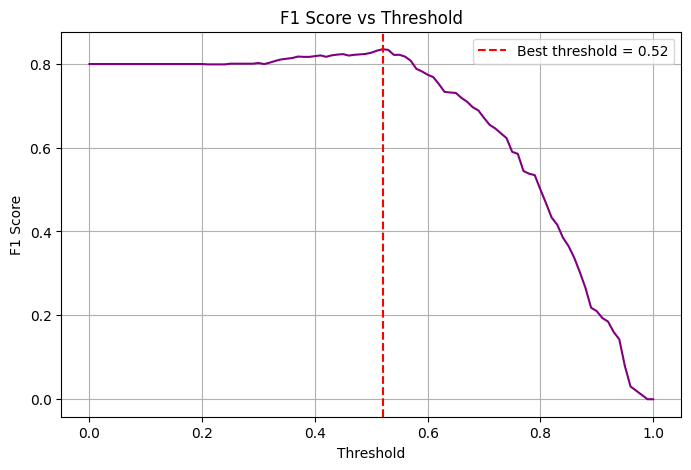

In [25]:
# Compute F1 for each threshold
f1_scores = []

for p, r in zip(precisions, recalls):
    if (p + r) == 0:
        f1 = 0
    else:
        f1 = 2 * p * r / (p + r)
    f1_scores.append(f1)

# Find threshold with maximum F1
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best F1 score: {best_f1:.3f} at threshold = {best_threshold:.2f}")

# plot F1 vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, f1_scores, color='purple')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best threshold = {best_threshold:.2f}')
plt.legend()
plt.grid(True)
plt.show()


##### Question 5

In [28]:
from sklearn.model_selection import KFold

df_full_train = train_data.copy()

# Target column
target_col = "converted"  # change if needed
y = df_full_train[target_col]
X = df_full_train.drop(columns=[target_col])

# KFold setup
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

auc_scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train[target_col].values
    y_val = df_val[target_col].values
    
    # Convert to dicts for DictVectorizer
    dv = DictVectorizer(sparse=False)
    train_dict = df_train.drop(columns=[target_col]).to_dict(orient='records')
    val_dict = df_val.drop(columns=[target_col]).to_dict(orient='records')
    
    X_train = dv.fit_transform(train_dict)
    X_val = dv.transform(val_dict)
    
    # Train logistic regression
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    auc_scores.append(auc)

# Results
print("AUC scores across folds:", np.round(auc_scores, 3))
print(f"Mean AUC: {np.mean(auc_scores):.3f}")
print(f"Standard deviation: {np.std(auc_scores):.3f}")

AUC scores across folds: [0.765 0.829 0.842 0.811 0.861]
Mean AUC: 0.822
Standard deviation: 0.032


##### Question 6

In [30]:
# Dataset setup
df_full_train = train_data.copy()
target_col = "converted"
y = df_full_train[target_col]
X = df_full_train.drop(columns=[target_col])

# Parameter values to test
C_values = [0.000001, 0.001, 1]

# KFold setup
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over C values
for C in C_values:
    auc_scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train[target_col].values
        y_val = df_val[target_col].values

        # Vectorize data
        dv = DictVectorizer(sparse=False)
        train_dict = df_train.drop(columns=[target_col]).to_dict(orient='records')
        val_dict = df_val.drop(columns=[target_col]).to_dict(orient='records')

        X_train = dv.fit_transform(train_dict)
        X_val = dv.transform(val_dict)

        # Train model
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, y_train)

        # Evaluate
        y_pred = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        auc_scores.append(auc)

    # Print results for this C
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    print(f"C={C}: mean AUC={mean_auc:.3f}, std={std_auc:.3f}")


C=1e-06: mean AUC=0.550, std=0.050
C=0.001: mean AUC=0.862, std=0.021
C=1: mean AUC=0.822, std=0.032
